### Financial Time series analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
os.getcwd()
os.chdir("C:/Users/NICK-TECH/Desktop/Training/Projects/Financial-data-analysis")

In [3]:
data = pd.read_csv("data/data.csv", index_col=0, header = [0,1])
data.head(10)

Price          Close                                 High                  \
Ticker          AAPL      GOOGL META       MSFT      AAPL      GOOGL META   
Date                                                                        
2010-01-04  6.418383  15.576997  NaN  23.173344  6.433078  15.645594  NaN   
2010-01-05  6.429479  15.508403  NaN  23.180832  6.465768  15.604090  NaN   
2010-01-06  6.327211  15.117455  NaN  23.038570  6.454973  15.554878  NaN   
2010-01-07  6.315512  14.765527  NaN  22.798985  6.358100  15.160700  NaN   
2010-01-08  6.357503  14.962370  NaN  22.956211  6.358104  14.992939  NaN   
2010-01-11  6.301422  14.939753  NaN  22.664209  6.388095  15.023012  NaN   
2010-01-12  6.229739  14.675558  NaN  22.514456  6.291221  14.866434  NaN   
2010-01-13  6.317612  14.591304  NaN  22.724104  6.326010  14.623365  NaN   
2010-01-14  6.281025  14.659900  NaN  23.180832  6.311916  14.768013  NaN   
2010-01-15  6.176054  14.415092  NaN  23.105959  6.346104  14.752107  NaN   

Price                       Low                                 Open  \
Ticker           MSFT      AAPL      GOOGL META       MSFT      AAPL   
Date                                                                   
2010-01-04  23.285654  6.369497  15.514615  NaN  22.903799  6.400988   
2010-01-05  23.285656  6.395589  15.447512  NaN  22.941237  6.436077   
2010-01-06  23.270678  6.320613  15.070233  NaN  22.851387  6.429481   
2010-01-07  22.986168  6.269626  14.729490  NaN  22.604313  6.350602   
2010-01-08  23.120932  6.269930  14.641509  NaN  22.641742  6.307118   
2010-01-11  23.031089  6.251636  14.764037  NaN  22.551899  6.382097   
2010-01-12  22.761538  6.190751  14.613921  NaN  22.394658  6.273826   
2010-01-13  22.851389  6.121172  14.263485  NaN  22.469534  6.234238   
2010-01-14  23.285656  6.268729  14.484930  NaN  22.656718  6.301420   
2010-01-15  23.390478  6.174255  14.366378  NaN  22.993648  6.326009   

Price                                     Volume                            
Ticker          GOOGL META       MSFT       AAPL      GOOGL META      MSFT  
Date                                                                        
2010-01-04  15.581967  NaN  22.926261  493729600   78169752  NaN  38409100  
2010-01-05  15.587686  NaN  23.098472  601904800  120067812  NaN  49749600  
2010-01-06  15.554878  NaN  23.120930  552160000  158988852  NaN  58182400  
2010-01-07  15.145787  NaN  22.933756  477131200  256315428  NaN  50559700  
2010-01-08  14.713336  NaN  22.671692  447610800  188783028  NaN  51197400  
2010-01-11  15.023012  NaN  22.993652  462229600  288227484  NaN  68754700  
2010-01-12  14.853758  NaN  22.574355  594459600  193937868  NaN  65912100  
2010-01-13  14.327855  NaN  22.656718  605892000  259604136  NaN  51863500  
2010-01-14  14.512021  NaN  22.694155  432894000  169434396  NaN  63228100  
2010-01-15  14.746639  NaN  23.270680  594067600  217162620  NaN  79913200

In [4]:
### Summary Statistics
summary_stats = data.describe()
summary_stats

Price         Close                                                High  \
Ticker         AAPL        GOOGL         META         MSFT         AAPL   
count   3993.000000  3993.000000  3394.000000  3993.000000  3993.000000   
mean      75.976495    68.457178   216.020985   147.312149    76.730844   
std       73.263018    55.471788   174.427327   143.249914    73.979245   
min        5.759779    10.837913    17.621372    17.387051     5.878245   
25%       18.173368    25.795088    93.848946    30.664412    18.302927   
50%       38.015537    51.278328   170.672844    77.558159    38.341887   
75%      141.657288   106.465691   279.106873   249.067978   143.406566   
max      275.250000   291.309998   789.467163   542.070007   277.051436   

Price                                                  Low               \
Ticker        GOOGL         META         MSFT         AAPL        GOOGL   
count   3993.000000  3394.000000  3993.000000  3993.000000  3993.000000   
mean      69.157291   218.730645   148.644692    75.147990    67.712915   
std       56.080089   176.568457   144.478494    72.460960    54.802396   
min       10.992253    18.158065    17.621305     5.705797    10.777269   
25%       26.088561    95.334790    30.947014    17.994631    25.579832   
50%       51.874707   172.397221    78.249230    37.420492    50.496718   
75%      107.289998   283.472491   251.730263   139.609447   104.417816   
max      292.010010   795.712965   554.538376   272.089996   287.320007   

Price                                    Open                            \
Ticker         META         MSFT         AAPL        GOOGL         META   
count   3394.000000  3993.000000  3993.000000  3993.000000  3394.000000   
mean     213.216093   145.846722    75.911999    68.424262   216.005333   
std      172.266311   141.916979    73.180049    55.417587   174.586745   
min       17.442475    17.175483     5.769377    10.893584    17.969228   
25%       92.969370    30.390081    18.146686    25.777165    94.214188   
50%      168.575786    76.950560    38.081993    51.246547   170.846776   
75%      274.572345   246.321883   140.865108   105.869792   277.429707   
max      780.293380   540.770020   276.721738   291.679993   790.616435   

Price                      Volume                                            
Ticker         MSFT          AAPL         GOOGL          META          MSFT  
count   3993.000000  3.993000e+03  3.993000e+03  3.394000e+03  3.993000e+03  
mean     147.278481  2.203686e+08  5.505220e+07  2.843736e+07  3.538578e+07  
std      143.251234  2.157501e+08  4.654903e+07  2.526791e+07  2.061205e+07  
min       17.447510  2.323470e+07  9.312000e+06  4.726100e+06  7.164500e+06  
25%       30.689339  7.896100e+07  2.733200e+07  1.490828e+07  2.199230e+07  
50%       77.668727  1.321256e+08  3.700040e+07  2.101485e+07  2.948080e+07  
75%      249.243992  2.927092e+08  7.037390e+07  3.239508e+07  4.333890e+07  
max      554.318706  1.880998e+09  5.923990e+08  5.735764e+08  3.193179e+08

### Plan d'analyse descriptive 
1. Fractionner le DataFrame en plusieurs DF (20 min)
2. Analyse individuelles des chroniques (4*15)
3. Analyse comparatives (Entreprises 2 à 2) (4*15)



In [ ]:
# Fractionner le DataFrame par entreprise
tickers = data.columns.get_level_values(1).unique()
company_dataframes = {}

for ticker in tickers:
    company_dataframes[ticker] = data.xs(ticker, level=1, axis=1)

print(company_dataframes['AAPL'].head())

DataFrame AAPL créé avec shape: (3993, 5)
DataFrame GOOGL créé avec shape: (3993, 5)
DataFrame META créé avec shape: (3993, 5)
DataFrame MSFT créé avec shape: (3993, 5)

Tickers disponibles: ['AAPL', 'GOOGL', 'META', 'MSFT']
Nombre d'entreprises: 4

--- Aperçu des données AAPL ---
Price          Close      High       Low      Open     Volume
Date                                                         
2010-01-04  6.418383  6.433078  6.369497  6.400988  493729600
2010-01-05  6.429479  6.465768  6.395589  6.436077  601904800
2010-01-06  6.327211  6.454973  6.320613  6.429481  552160000
2010-01-07  6.315512  6.358100  6.269626  6.350602  477131200
2010-01-08  6.357503  6.358104  6.269930  6.307118  447610800


In [ ]:
data_appl = company_dataframes['AAPL']
data_googl = company_dataframes['GOOGL']
data_meta = company_dataframes['META']
data_msft = company_dataframes['MSFT']

### Analyses Individuelles par entreprise

#### Aperçu des données

####

In [10]:
for i in company_dataframes.keys():
    print(f"\n--- Aperçu des données {i} ---")
    print(company_dataframes[i].head())
    print(company_dataframes[i].describe())


--- Aperçu des données AAPL ---
Price          Close      High       Low      Open     Volume
Date                                                         
2010-01-04  6.418383  6.433078  6.369497  6.400988  493729600
2010-01-05  6.429479  6.465768  6.395589  6.436077  601904800
2010-01-06  6.327211  6.454973  6.320613  6.429481  552160000
2010-01-07  6.315512  6.358100  6.269626  6.350602  477131200
2010-01-08  6.357503  6.358104  6.269930  6.307118  447610800
Price        Close         High          Low         Open        Volume
count  3993.000000  3993.000000  3993.000000  3993.000000  3.993000e+03
mean     75.976495    76.730844    75.147990    75.911999  2.203686e+08
std      73.263018    73.979245    72.460960    73.180049  2.157501e+08
min       5.759779     5.878245     5.705797     5.769377  2.323470e+07
25%      18.173368    18.302927    17.994631    18.146686  7.896100e+07
50%      38.015537    38.341887    37.420492    38.081993  1.321256e+08
75%     141.657288   143.4065

#### Représentations graphiques 

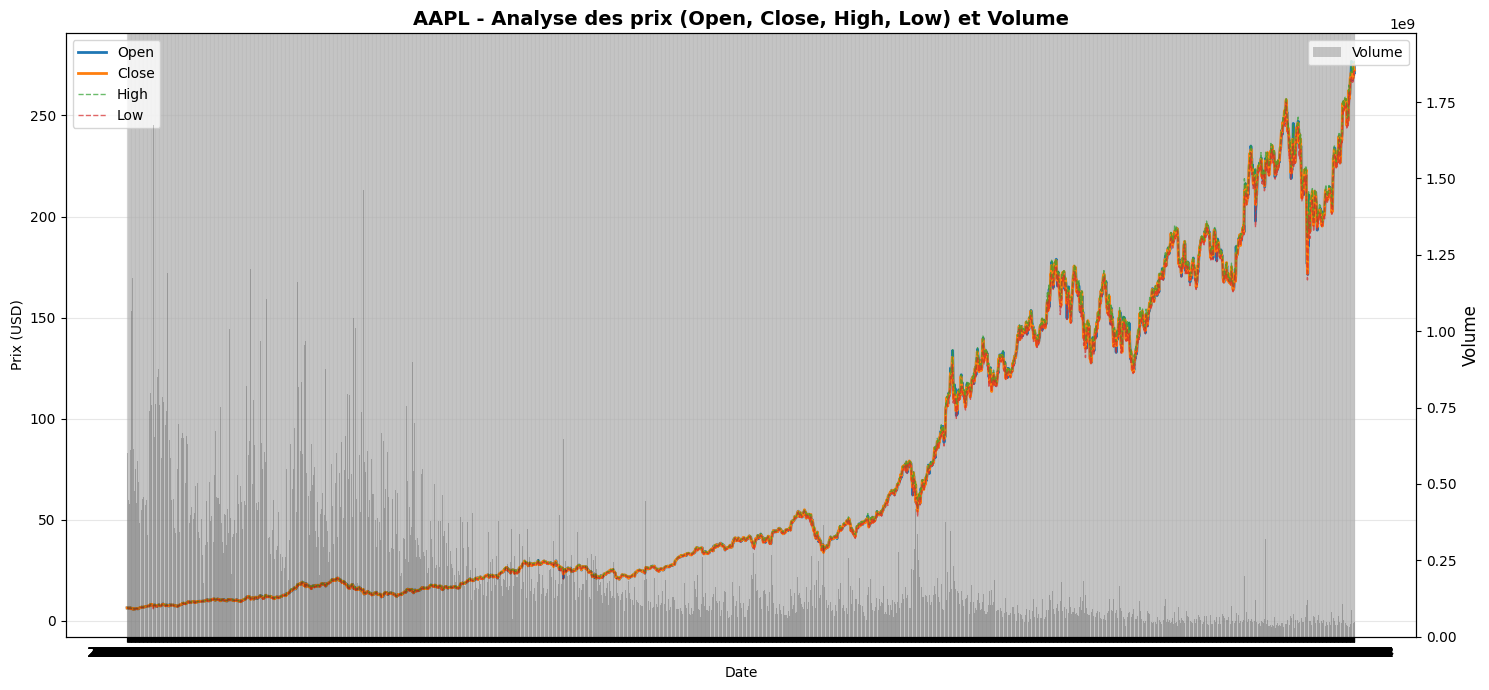

In [ ]:
for i in company_dataframes.keys():
    fig, ax1 = plt.subplots(figsize=(15, 7))
    
    # Axe gauche pour les prix
    ax1.plot(company_dataframes[i].index, company_dataframes[i]['Open'], label='Open', linewidth=2)
    ax1.plot(company_dataframes[i].index, company_dataframes[i]['Close'], label='Close', linewidth=2)
    ax1.plot(company_dataframes[i].index, company_dataframes[i]['High'], label='High', linewidth=1, linestyle='--', alpha=0.7)
    ax1.plot(company_dataframes[i].index, company_dataframes[i]['Low'], label='Low', linewidth=1, linestyle='--', alpha=0.7)
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Prix (USD)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(loc='upper left', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Axe droit pour le volume
    ax2 = ax1.twinx()
    ax2.bar(company_dataframes[i].index, company_dataframes[i]['Volume'], alpha=0.2, color='black', label='Volume')
    ax2.set_ylabel('Volume', fontsize=12, color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    ax2.legend(loc='upper right', fontsize=10)
    
    plt.title(f'{i} - Analyse des prix (Open, Close, High, Low) et Volume', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [ ]:

# Graphiques séparés pour chaque indicateur
for ticker in company_dataframes.keys():
    df = company_dataframes[ticker]
    
    # Créer une figure avec 5 sous-graphiques
    fig, axes = plt.subplots(5, 1, figsize=(14, 12))
    fig.suptitle(f'{ticker} - Analyse détaillée', fontsize=16, fontweight='bold')
    
    # Graphique 1: Open Price
    axes[0].plot(df.index, df['Open'], color='blue', linewidth=2, label='Open Price')
    axes[0].set_ylabel('Open (USD)', fontsize=11)
    axes[0].set_title('Prix d\'ouverture', fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    axes[0].legend(loc='upper left')
    
    # Graphique 2: Close Price
    axes[1].plot(df.index, df['Close'], color='green', linewidth=2, label='Close Price')
    axes[1].set_ylabel('Close (USD)', fontsize=11)
    axes[1].set_title('Prix de clôture', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    axes[1].legend(loc='upper left')
    
    # Graphique 3: High Price
    axes[2].plot(df.index, df['High'], color='orange', linewidth=2, label='High Price')
    axes[2].set_ylabel('High (USD)', fontsize=11)
    axes[2].set_title('Prix maximum', fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend(loc='upper left')
    
    # Graphique 4: Low Price
    axes[3].plot(df.index, df['Low'], color='red', linewidth=2, label='Low Price')
    axes[3].set_ylabel('Low (USD)', fontsize=11)
    axes[3].set_title('Prix minimum', fontsize=12, fontweight='bold')
    axes[3].grid(True, alpha=0.3)
    axes[3].legend(loc='upper left')
    
    # Graphique 5: Volume
    axes[4].bar(df.index, df['Volume'], color='purple', alpha=0.7, label='Volume')
    axes[4].set_ylabel('Volume', fontsize=11)
    axes[4].set_xlabel('Date', fontsize=11)
    axes[4].set_title('Volume de trading', fontsize=12, fontweight='bold')
    axes[4].grid(True, alpha=0.3, axis='y')
    axes[4].legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()
